# Random Forest Classifier - Yeast Dataset


In [26]:
# Import libraries
import sys
sys.path.append('..')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, learning_curve, validation_curve
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
import joblib

# Import project modules
from src.data_loader import load_processed_data
from src.config import *
from src.visualization import plot_confusion_matrix, plot_learning_curves

print("📊 Random Forest Classifier Analysis")
print("=" * 40)


📊 Random Forest Classifier Analysis


In [27]:
# Load the processed data
print("1. Loading processed data...")
X_train, X_test, y_train, y_test = load_processed_data()

print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")
print(f"Number of classes: {len(np.unique(y_train))}")

# Load class names
label_encoder = np.load(MODELS_DIR / 'label_encoder.npy', allow_pickle=True)
class_names = label_encoder
print(f"Class names: {class_names}")


1. Loading processed data...
Training data shape: (1038, 8)
Test data shape: (446, 8)
Number of classes: 10
Class names: ['CYT' 'ERL' 'EXC' 'ME1' 'ME2' 'ME3' 'MIT' 'NUC' 'POX' 'VAC']


In [28]:
# Load the trained Random Forest model
print("2. Loading trained Random Forest model...")
model = joblib.load(MODELS_DIR / 'random_forest.pkl')

print(f"Model type: {type(model)}")
print(f"Number of trees: {model.n_estimators}")
print(f"Max depth: {model.max_depth}")
print(f"Random state: {model.random_state}")

# Make predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)

print(f"Predictions shape: {y_pred.shape}")
print(f"Prediction probabilities shape: {y_pred_proba.shape}")


2. Loading trained Random Forest model...
Model type: <class 'sklearn.ensemble._forest.RandomForestClassifier'>
Number of trees: 300
Max depth: 20
Random state: 42
Predictions shape: (446,)
Prediction probabilities shape: (446, 10)


/opt/homebrew/lib/python3.13/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/opt/homebrew/lib/python3.13/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [29]:
# Model Performance Analysis
print("3. Model Performance Analysis")
print("=" * 30)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Detailed classification report
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))


3. Model Performance Analysis
Accuracy: 0.6233
Precision: 0.6112
Recall: 0.6233
F1-Score: 0.6116

Detailed Classification Report:
              precision    recall  f1-score   support

         CYT       0.56      0.67      0.61       139
         ERL       0.00      0.00      0.00         2
         EXC       0.67      0.55      0.60        11
         ME1       0.65      0.85      0.73        13
         ME2       0.60      0.40      0.48        15
         ME3       0.78      0.94      0.85        49
         MIT       0.65      0.56      0.60        73
         NUC       0.61      0.56      0.58       129
         POX       1.00      0.50      0.67         6
         VAC       0.00      0.00      0.00         9

    accuracy                           0.62       446
   macro avg       0.55      0.50      0.51       446
weighted avg       0.61      0.62      0.61       446



/opt/homebrew/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/homebrew/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/homebrew/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/homebrew/lib/python3.13

4. Confusion Matrix


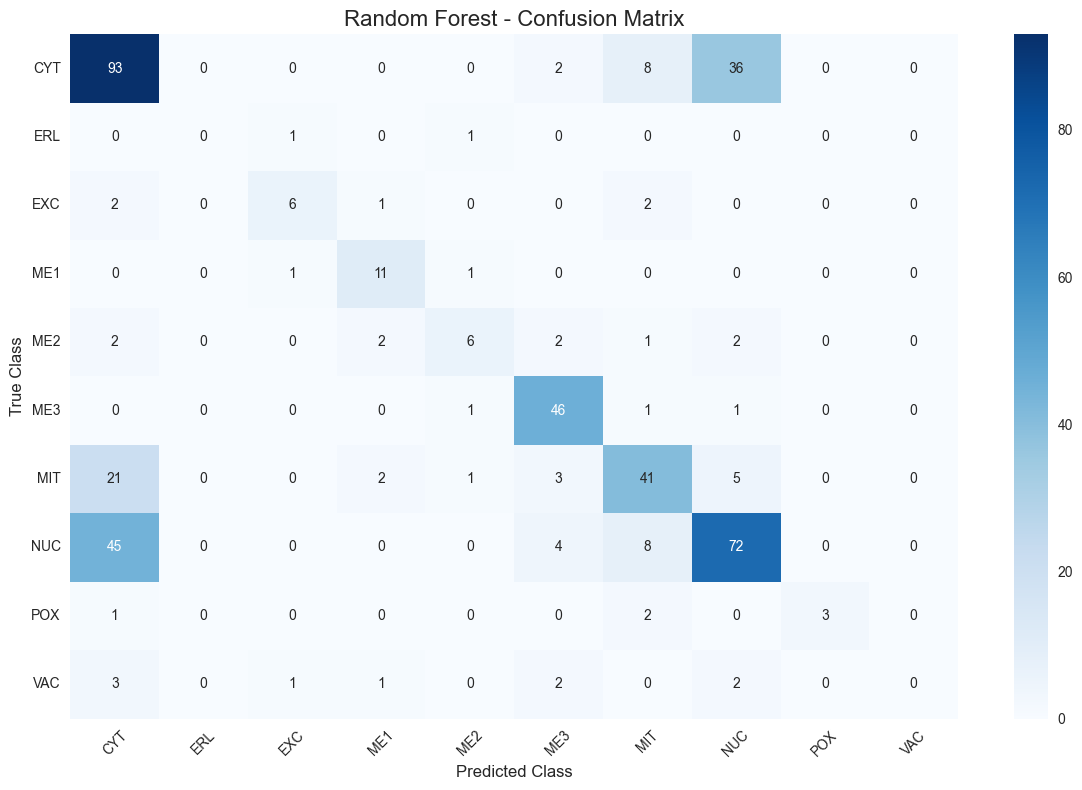


Per-class Accuracy:
CYT: 0.669
ERL: 0.000
EXC: 0.545
ME1: 0.846
ME2: 0.400
ME3: 0.939
MIT: 0.562
NUC: 0.558
POX: 0.500
VAC: 0.000


In [30]:
# Confusion Matrix Visualization
print("4. Confusion Matrix")
print("=" * 20)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names)
plt.title('Random Forest - Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Class', fontsize=12)
plt.ylabel('True Class', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Calculate per-class accuracy
class_accuracy = cm.diagonal() / cm.sum(axis=1)
print("\nPer-class Accuracy:")
for i, (class_name, acc) in enumerate(zip(class_names, class_accuracy)):
    print(f"{class_name}: {acc:.3f}")


5. Feature Importance Analysis


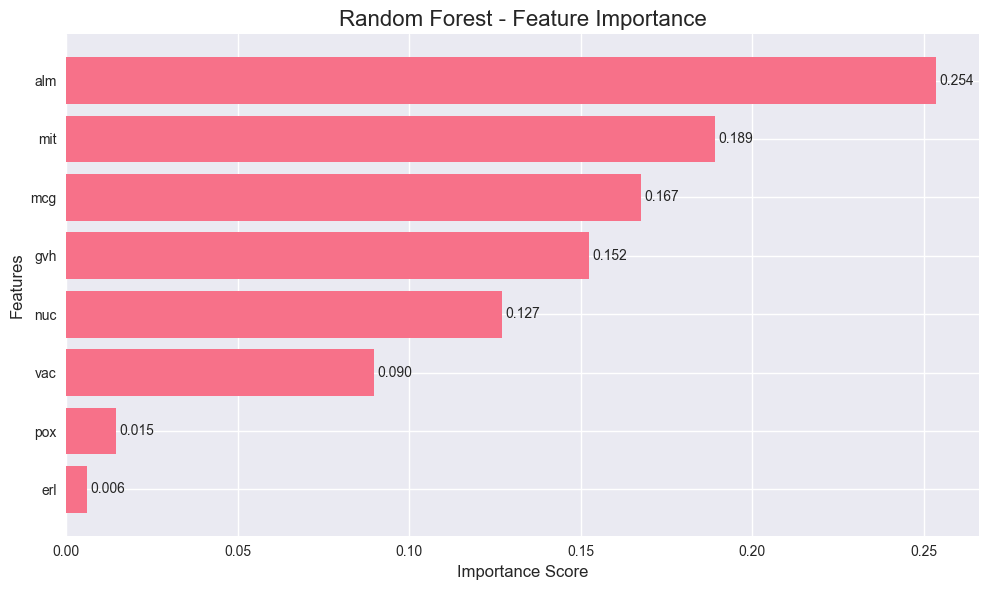


Feature Importance (sorted):
erl: 0.0059
pox: 0.0146
vac: 0.0898
nuc: 0.1271
gvh: 0.1524
mcg: 0.1675
mit: 0.1892
alm: 0.2536


In [31]:
# Feature Importance Analysis
print("5. Feature Importance Analysis")
print("=" * 30)

# Get feature importance
feature_importance = model.feature_importances_
feature_names = ['mcg', 'gvh', 'alm', 'mit', 'erl', 'pox', 'vac', 'nuc']

# Create feature importance DataFrame
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importance
}).sort_values('importance', ascending=True)

# Plot feature importance
plt.figure(figsize=(10, 6))
bars = plt.barh(importance_df['feature'], importance_df['importance'])
plt.title('Random Forest - Feature Importance', fontsize=16)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)

# Add value labels on bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.001, bar.get_y() + bar.get_height()/2, 
             f'{width:.3f}', ha='left', va='center')

plt.tight_layout()
plt.show()

print("\nFeature Importance (sorted):")
for _, row in importance_df.iterrows():
    print(f"{row['feature']}: {row['importance']:.4f}")


6. Learning Curves Analysis


/opt/homebrew/lib/python3.13/site-packages/sklearn/model_selection/_split.py:811: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


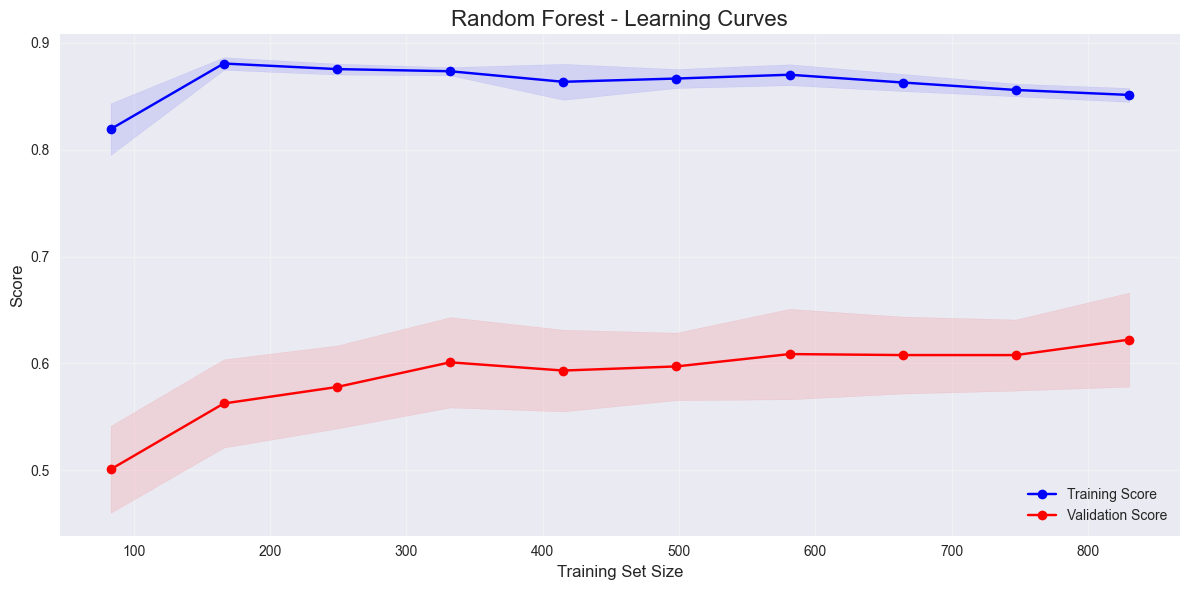

Final training score: 0.8513 ± 0.0065
Final validation score: 0.6223 ± 0.0440


In [32]:
# Learning Curves
print("6. Learning Curves Analysis")
print("=" * 30)

# Generate learning curves
train_sizes, train_scores, val_scores = learning_curve(
    model, X_train, y_train, cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate mean and std
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot learning curves
plt.figure(figsize=(12, 6))
plt.plot(train_sizes, train_mean, 'o-', label='Training Score', color='blue')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
plt.plot(train_sizes, val_mean, 'o-', label='Validation Score', color='red')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color='red')

plt.title('Random Forest - Learning Curves', fontsize=16)
plt.xlabel('Training Set Size', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Final training score: {train_mean[-1]:.4f} ± {train_std[-1]:.4f}")
print(f"Final validation score: {val_mean[-1]:.4f} ± {val_std[-1]:.4f}")


7. ROC Curves Analysis


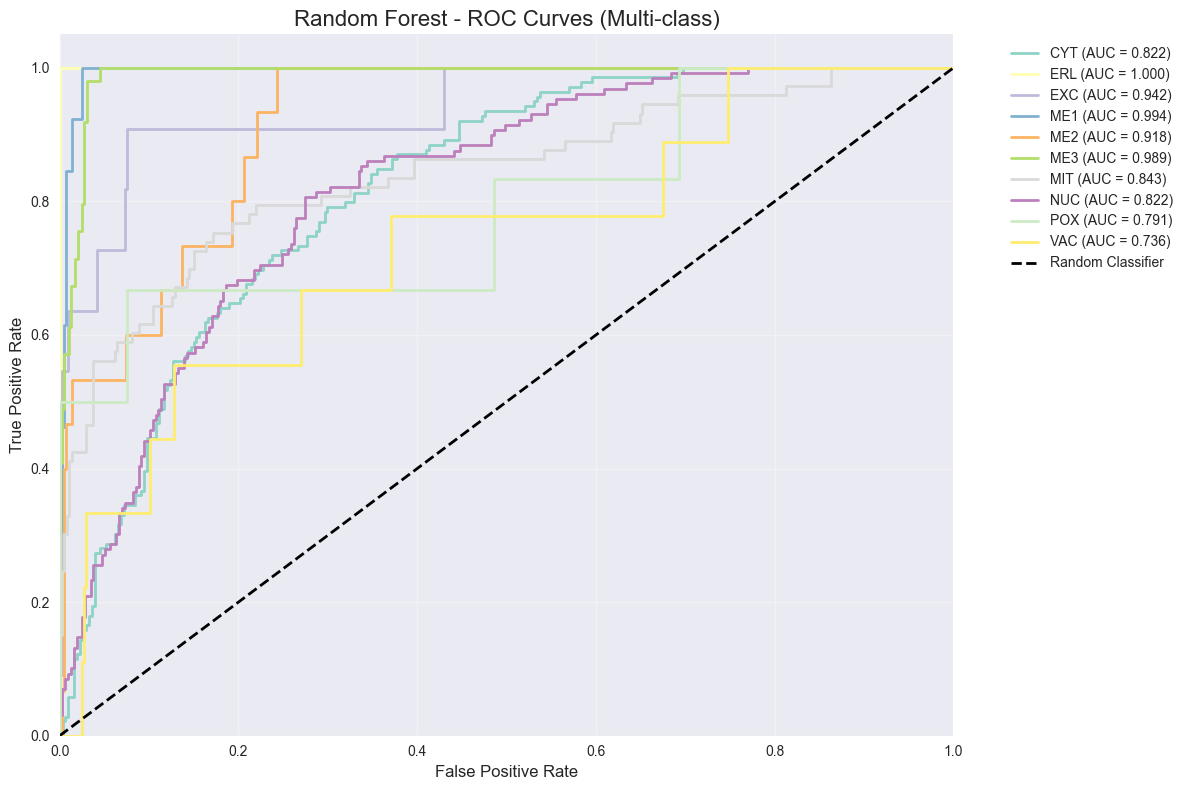

Macro-average ROC AUC: 0.8857
Individual class AUCs:
  CYT: 0.8218
  ERL: 1.0000
  EXC: 0.9417
  ME1: 0.9943
  ME2: 0.9177
  ME3: 0.9895
  MIT: 0.8433
  NUC: 0.8215
  POX: 0.7909
  VAC: 0.7361


In [33]:
# ROC Curves for Multi-class Classification
print("7. ROC Curves Analysis")
print("=" * 25)

# Binarize the output for multi-class ROC
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(12, 8))
colors = plt.cm.Set3(np.linspace(0, 1, n_classes))

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'{class_names[i]} (AUC = {roc_auc[i]:.3f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Random Forest - ROC Curves (Multi-class)', fontsize=16)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Calculate macro-average ROC AUC
macro_auc = np.mean(list(roc_auc.values()))
print(f"Macro-average ROC AUC: {macro_auc:.4f}")
print(f"Individual class AUCs:")
for i, class_name in enumerate(class_names):
    print(f"  {class_name}: {roc_auc[i]:.4f}")
